In [2]:
import pandas

dct = {"Product": ("test", "test2"), "Stock": (1,2), "Buying_price": (0.89,2), "Selling_price": (1,3)}

df = pandas.DataFrame(dct)

df.set_index("Product", inplace=True)

df.to_csv("./storage/db.csv")

df

,Stock,Buying_price,Selling_price
Product,,,
test,1,0.89,1
test2,2,2.00,3


In [3]:
import pandas as pd

class StockManagement(object):
    def __init__(self):
        self.db = pd.read_csv("./storage/db.csv").set_index("Product")

    def save_db(self):
        self.db.to_csv("./storage/db.csv")

    def add_entry(self, name:str, stock:int, buying_price:float, selling_price: float):
        dct = {"Product": name, "Stock": stock, "Buying_price": buying_price, "Selling_price": selling_price, "total_sold": 0, "average_sold": 0}
        self.db.loc[name] = dct
        self.save_db()
    
    def remove_entry(self, name:str):
        self.db.drop(name, inplace=True, axis=0)

    def mod_price(self, name:str, new_price:float):
        self.db.at[name, 'Selling_price']= new_price
    
    def mod_bprice(self, name:str, new_bprice:float):
        self.db.at[name, "Buying_price"] = new_bprice

    def add_stock(self, name:str, amount:int):
        self.db.at[name, "Stock"] += amount

    def used(self, name:str, amount:int):
        self.db.at[name, "Stock"] -= amount

class TicketManager(object):
    def __init__(self):
        self.db = pd.read_csv("./storage/WS2425/ticket_db.csv").set_index("Date")
    
    def save_db(self):
        self.db.to_csv("./storage/WS2425/ticket_db.csv")

    def save_tickets(self, name:str, date:str, tickets_sold: int, free_tickets:int, clubcards: int, genres:list, goal:int, startnr:int, endnr:int):
        dct = {"Movie": name, "Tickets": tickets_sold, "Free-Tickets": free_tickets, "Club-Cards": clubcards, "Genres": genres, "Visitors": tickets_sold+free_tickets, "Goal": goal, "Start-Nr": startnr, "End-Nr": endnr}
        self.db.loc[date] = dct
        self.add_total()
        self.save_db()
    
    def add_total(self):
        self.db.drop("Total", inplace=True, axis=0)
        dct = {"Date": None, "Tickets": self.db["Tickets"].sum(), "Free-Tickets": self.db["Free-Tickets"].sum(), "Club-Cards": self.db["Club-Cards"].sum(), "Visitors": self.db["Visitors"].sum(), "Goal": self.db["Goal"].sum()}
        self.db.loc["Total"] = dct

    def modify_ticket(self, date:str,ticket: int):
        self.db.at[date, "Tickets"] = ticket
        self.update_db(date=date)
        self.save_db()


    def modify_freeticket(self, date:str, ticket:int):
        self.db.at[date, "Free-Tickets"] = ticket
        self.update_db(date=date)
        self.save_db()

    def modify_clubcards(self, date:str, cards:int):
        self.db.at[date, "Club-Cards"] = cards
        self.save_db()

    def modify_genres(self, date:str, genres:list):
        self.db.at[date, "Genres"] = genres
        self.save_db()

    def modify_goal(self, date:str, goal:int):
        self.db.at[date, "Goal"] = goal
        self.save_db()

    def modify_startnr(self, date:str, startnr:int):
        self.db.at[date, "Start-Nr"] = startnr
        self.save_db()

    def modify_endnr(self, date:str, endnr:int):
        self.db.at[date, "End-Nr"] = endnr
        self.save_db()

    def update_db(self, date:str):
        entry = self.db.loc[date]
        self.db.at[date, "Visitors"] = entry["Tickets"] + entry["Free-Tickets"]

    def plot_goal(self):
        self.db.plot(y=["Goal", "Visitors"])




In [4]:
tickm = TicketManager()
#tickm.save_tickets(name="Scarface", date="30.10.2024", tickets_sold=15, free_tickets=14, clubcards=26, genres=["Thriller"], goal=10, startnr=267585, endnr=267599)

tickm.db


,Movie,Tickets,Free-Tickets,Club-Cards,Genres,Visitors,Goal,Start-Nr,End-Nr
Date,,,,,,,,,
16.10.2024,Deadpool,22,0,22,"['Action', 'Comedy']",22,20,267201.0,267222.0
23.10.2024,Chantal im Märchenland,35,14,49,['Comedy'],49,50,267223.0,267258.0
30.10.2024,Scarface,15,14,26,['Thriller'],29,10,267585.0,267599.0
06.11.2024,Dunkirk,15,1,10,"['Action', 'Thriller']",16,40,267260.0,267274.0
Total,NaN,87,29,107,NaN,116,120,NaN,NaN


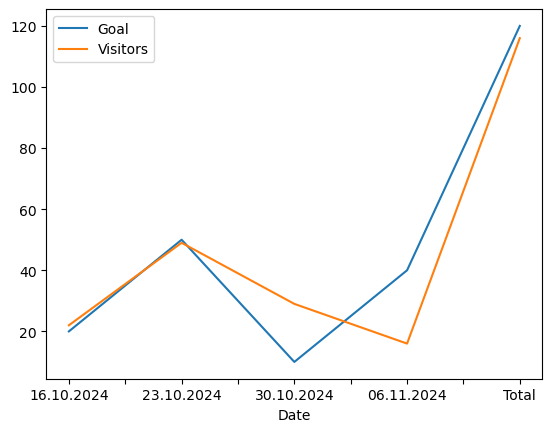

In [5]:
tickm.plot_goal()